# **Preprocessing F folder**

Load Dataset

In [2]:
# Train F Images
import os
import cv2

# Define the directory containing the images
data_dir = "ECG_Image_data/train/F"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.png')]

# Load an example image
example_image = cv2.imread(image_files[0])


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Resize Images

In [4]:
import cv2
import os

# Assuming `image_files` is a list of file paths to your images
# Load an example image to check dimensions
example_image = cv2.imread(image_files[0])

# Check the number of images
num_images = len(image_files)

# Check the dimensions of an image
image_height, image_width, channels = example_image.shape

print("Number of images:", num_images)
print("Image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Define the new size
new_size = (224, 224)

# Directory to save resized images
save_directory = "resized_images_of_F"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image
def resize_image(image_path, new_size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Loop through all images and resize them
resized_images = []
for image_path in image_files:
    resized_image = resize_image(image_path, new_size)
    resized_images.append(resized_image)

# Save the resized images to the specified directory
for idx, image in enumerate(resized_images):
    save_path = os.path.join(save_directory, f"resized_image_{idx}.png")
    cv2.imwrite(save_path, image)
    print(f"Saved resized image to {save_path}")


Number of images: 642
Image dimensions: 288 x 432
Number of channels: 3
Saved resized image to resized_images_of_F\resized_image_0.png
Saved resized image to resized_images_of_F\resized_image_1.png
Saved resized image to resized_images_of_F\resized_image_2.png
Saved resized image to resized_images_of_F\resized_image_3.png
Saved resized image to resized_images_of_F\resized_image_4.png
Saved resized image to resized_images_of_F\resized_image_5.png
Saved resized image to resized_images_of_F\resized_image_6.png
Saved resized image to resized_images_of_F\resized_image_7.png
Saved resized image to resized_images_of_F\resized_image_8.png
Saved resized image to resized_images_of_F\resized_image_9.png
Saved resized image to resized_images_of_F\resized_image_10.png
Saved resized image to resized_images_of_F\resized_image_11.png
Saved resized image to resized_images_of_F\resized_image_12.png
Saved resized image to resized_images_of_F\resized_image_13.png
Saved resized image to resized_images_of_F

Data Inspection

In [5]:
import cv2
import os
import glob

# Directory containing the resized images
folder_path = "resized_images_of_F"

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Check the dimensions of the first image as a reference
example_image = cv2.imread(image_files[0])
image_height, image_width, channels = example_image.shape
print("Example image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break


Number of images: 642
Example image dimensions: 224 x 224
Number of channels: 3


Visualization

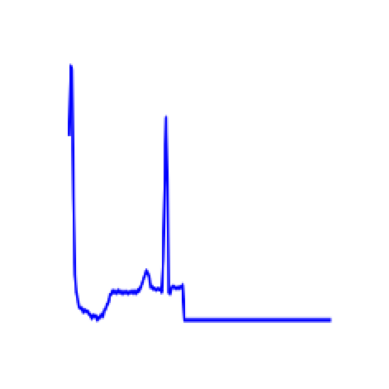

In [6]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Distribution of Classes

In [7]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)


Class Distribution:
Counter({Ellipsis: 1})


Image Statistics

In [8]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 251.4641794217687
Standard deviation of pixel values: 27.00954579866386


Data Preprocessing

In [9]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Color Distribution

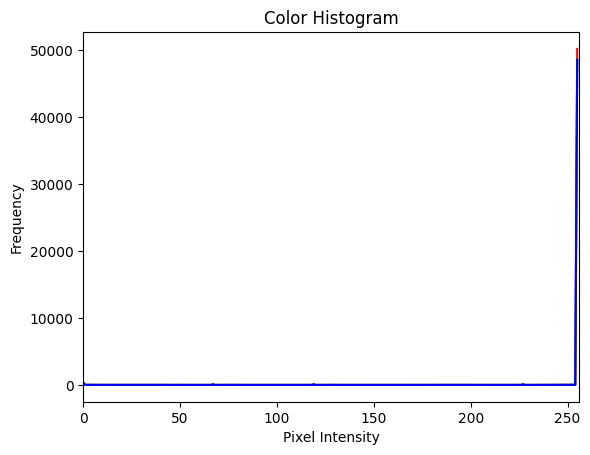

In [10]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

Feature Extraction

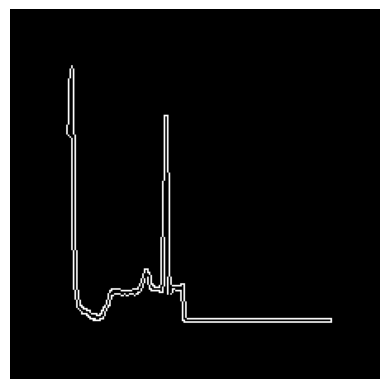

In [11]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Dimensionality Reduction

C:\Users\Student\AppData\Local\Temp\8\ipykernel_28976\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


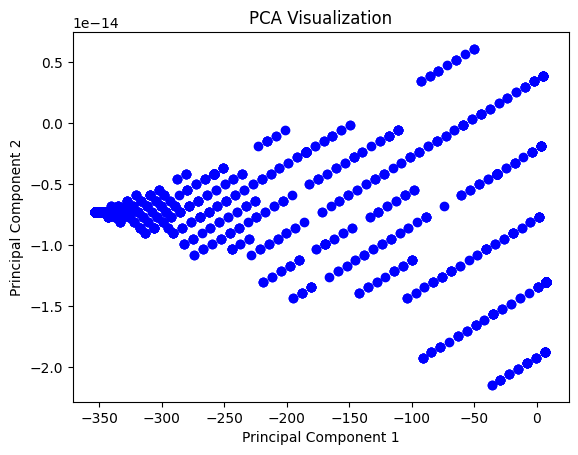

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


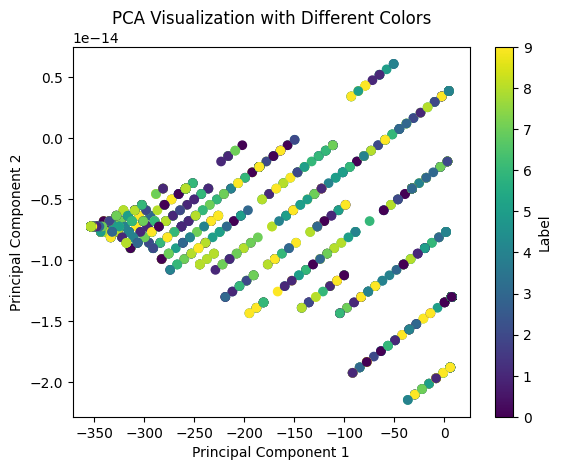

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()


Correlation Analysis

C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


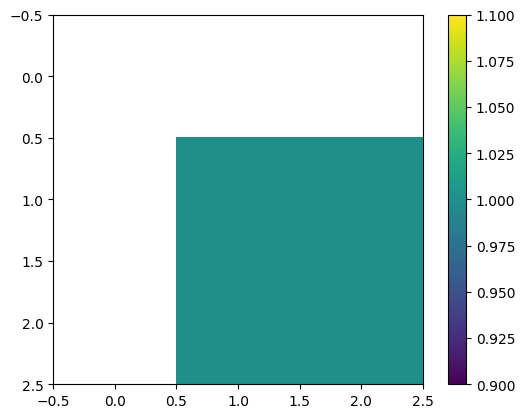

In [14]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

Outlier Detection

In [15]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([ 7428,  7428,  7652, ..., 42528, 42529, 42529], dtype=int64), array([1, 2, 1, ..., 2, 1, 2], dtype=int64))


Data Augmentation

In [16]:
# Example: Data augmentation using OpenCV
# (e.g., flipping, rotation, scaling)
flipped_image = cv2.flip(example_image, 1)
print(flipped_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Label Analysis

In [17]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# **Preprocessing M folder**

Load Dataset

In [18]:
# Train M Images
import os
import cv2

# Define the directory containing the images
data_dir = "ECG_Image_data/train/M"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.png')]

# Load an example image
example_image = cv2.imread(image_files[0])


Resize Images

In [19]:
import cv2
import os

# Assuming `image_files` is a list of file paths to your images
# Load an example image to check dimensions
example_image = cv2.imread(image_files[0])

# Check the number of images
num_images = len(image_files)

# Check the dimensions of an image
image_height, image_width, channels = example_image.shape

print("Number of images:", num_images)
print("Image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Define the new size
new_size = (224, 224)

# Directory to save resized images
save_directory = "resized_images_of_M"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image
def resize_image(image_path, new_size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Loop through all images and resize them
resized_images = []
for image_path in image_files:
    resized_image = resize_image(image_path, new_size)
    resized_images.append(resized_image)

# Save the resized images to the specified directory
for idx, image in enumerate(resized_images):
    save_path = os.path.join(save_directory, f"resized_image_{idx}.png")
    cv2.imwrite(save_path, image)
    print(f"Saved resized image to {save_path}")


Number of images: 8405
Image dimensions: 288 x 432
Number of channels: 3
Saved resized image to resized_images_of_M\resized_image_0.png
Saved resized image to resized_images_of_M\resized_image_1.png
Saved resized image to resized_images_of_M\resized_image_2.png
Saved resized image to resized_images_of_M\resized_image_3.png
Saved resized image to resized_images_of_M\resized_image_4.png
Saved resized image to resized_images_of_M\resized_image_5.png
Saved resized image to resized_images_of_M\resized_image_6.png
Saved resized image to resized_images_of_M\resized_image_7.png
Saved resized image to resized_images_of_M\resized_image_8.png
Saved resized image to resized_images_of_M\resized_image_9.png
Saved resized image to resized_images_of_M\resized_image_10.png
Saved resized image to resized_images_of_M\resized_image_11.png
Saved resized image to resized_images_of_M\resized_image_12.png
Saved resized image to resized_images_of_M\resized_image_13.png
Saved resized image to resized_images_of_

Data Inspection

In [20]:
import cv2
import os
import glob

# Directory containing the resized images
folder_path = "resized_images_of_M"

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Check the dimensions of the first image as a reference
example_image = cv2.imread(image_files[0])
image_height, image_width, channels = example_image.shape
print("Example image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break


SyntaxError: invalid syntax (2133967390.py, line 27)

Visualization

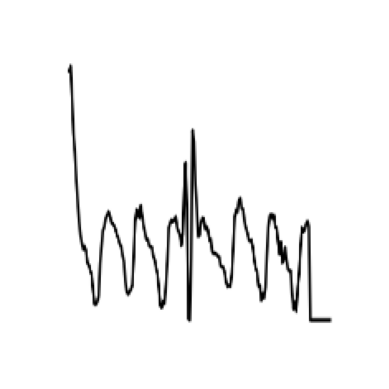

In [23]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Distribution of Classes

In [24]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)


Class Distribution:
Counter({Ellipsis: 1})


Image Statistics

In [25]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 245.06030771683675
Standard deviation of pixel values: 44.755007235050165


Data Preprocessing

In [26]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Color Distribution

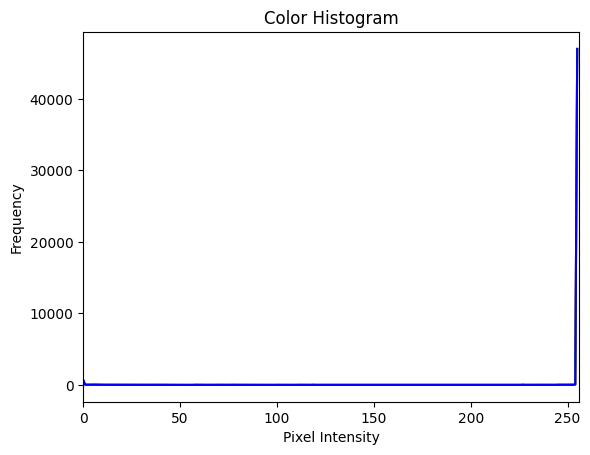

In [27]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')

plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

Feature Extraction

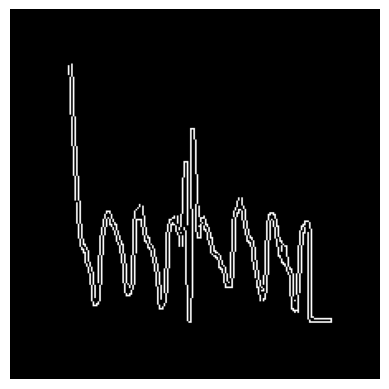

In [28]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Dimensionality Reduction

C:\Users\Student\AppData\Local\Temp\8\ipykernel_29740\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


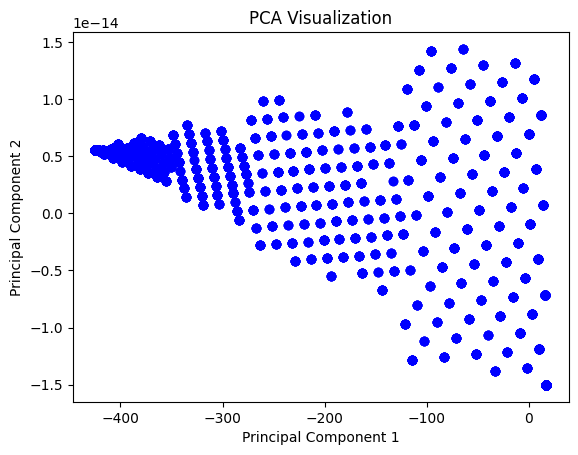

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


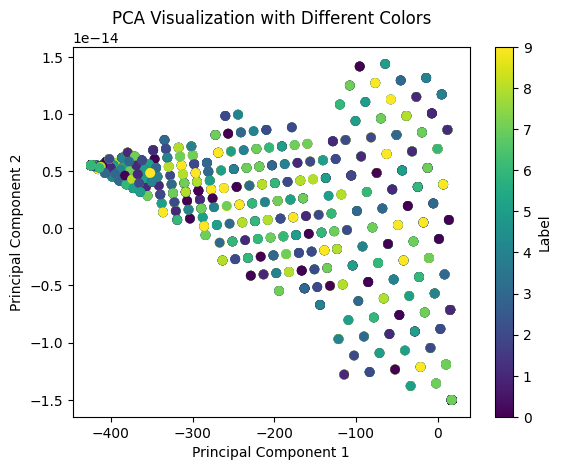

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()


Correlation Analysis

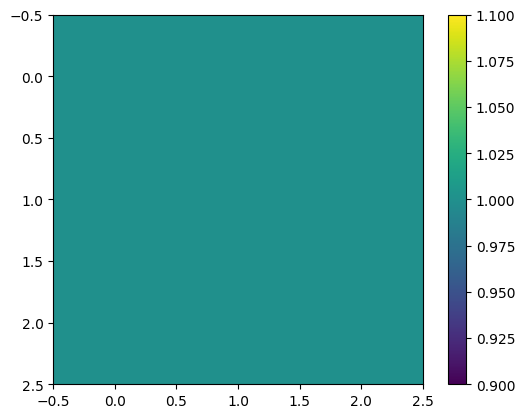

In [31]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

Outlier Detection

In [32]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([ 7652,  7652,  7652, ..., 42305, 42305, 42305], dtype=int64), array([0, 1, 2, ..., 0, 1, 2], dtype=int64))


Data Augmentation

In [33]:
# Example: Data augmentation using OpenCV
# (e.g., flipping, rotation, scaling)
flipped_image = cv2.flip(example_image, 1)
print(flipped_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Labels Analysis

In [34]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# **Preprocessing N folder**

Load Dataset

In [35]:
# Train N Images
import os
import cv2

# Define the directory containing the images
data_dir = "ECG_Image_data/train/N"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.png')]

# Load an example image
example_image = cv2.imread(image_files[0])


Resize Images

In [36]:
import cv2
import os

# Assuming `image_files` is a list of file paths to your images
# Load an example image to check dimensions
example_image = cv2.imread(image_files[0])

# Check the number of images
num_images = len(image_files)

# Check the dimensions of an image
image_height, image_width, channels = example_image.shape

print("Number of images:", num_images)
print("Image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Define the new size
new_size = (224, 224)

# Directory to save resized images
save_directory = "resized_images_of_N"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image
def resize_image(image_path, new_size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Loop through all images and resize them
resized_images = []
for image_path in image_files:
    resized_image = resize_image(image_path, new_size)
    resized_images.append(resized_image)

# Save the resized images to the specified directory
for idx, image in enumerate(resized_images):
    save_path = os.path.join(save_directory, f"resized_image_{idx}.png")
    cv2.imwrite(save_path, image)
    print(f"Saved resized image to {save_path}")


Number of images: 75709
Image dimensions: 288 x 432
Number of channels: 3
Saved resized image to resized_images_of_N\resized_image_0.png
Saved resized image to resized_images_of_N\resized_image_1.png
Saved resized image to resized_images_of_N\resized_image_2.png
Saved resized image to resized_images_of_N\resized_image_3.png
Saved resized image to resized_images_of_N\resized_image_4.png
Saved resized image to resized_images_of_N\resized_image_5.png
Saved resized image to resized_images_of_N\resized_image_6.png
Saved resized image to resized_images_of_N\resized_image_7.png
Saved resized image to resized_images_of_N\resized_image_8.png
Saved resized image to resized_images_of_N\resized_image_9.png
Saved resized image to resized_images_of_N\resized_image_10.png
Saved resized image to resized_images_of_N\resized_image_11.png
Saved resized image to resized_images_of_N\resized_image_12.png
Saved resized image to resized_images_of_N\resized_image_13.png
Saved resized image to resized_images_of

Data Inspection

In [37]:
import cv2
import os
import glob

# Directory containing the resized images
folder_path = "resized_images_of_N"

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Check the number of images

num_images = len(image_files)
print("Number of images:", num_images)

# Check the dimensions of the first image as a reference
example_image = cv2.imread(image_files[0])
image_height, image_width, channels = example_image.shape
print("Example image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break


Number of images: 75709
Example image dimensions: 224 x 224
Number of channels: 3


Visualization

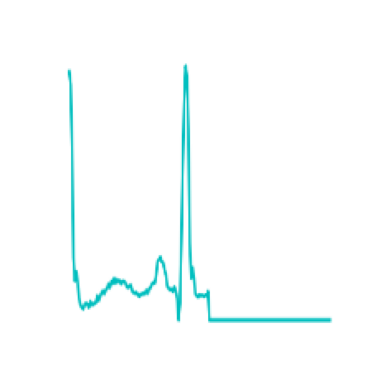

In [38]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Distribution of Classes

In [39]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)


Class Distribution:
Counter({Ellipsis: 1})


Image Statistics

In [40]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)

print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 251.99423363095238
Standard deviation of pixel values: 21.594581864408674


Data Preprocessing

In [41]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Color Distribution

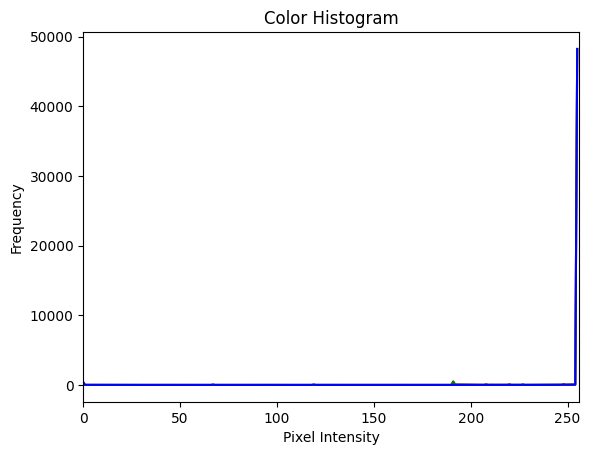

In [42]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

Feature Extraction

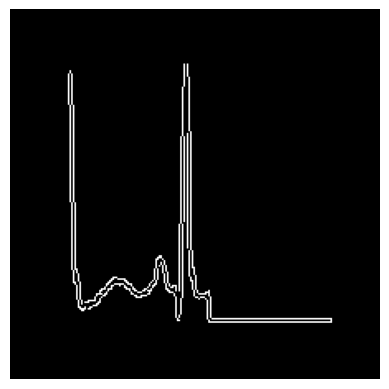

In [43]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Dimensionality Reduction

C:\Users\Student\AppData\Local\Temp\8\ipykernel_29740\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


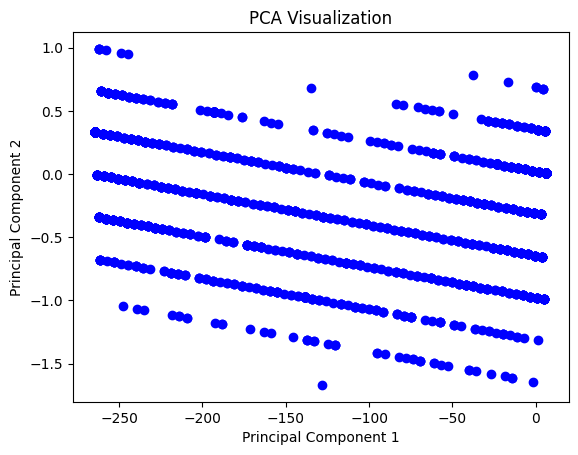

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


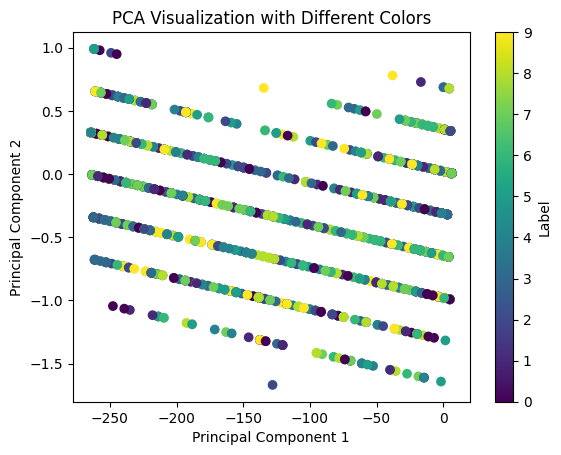

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()


Correlation Analysis

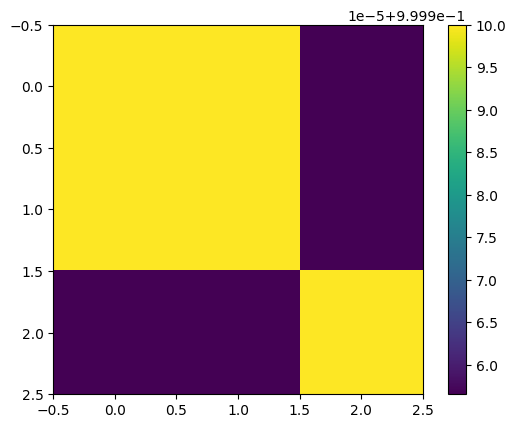

In [46]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

Outlier Detection

In [47]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([ 7498,  7721,  7722, ..., 42527, 42528, 42529], dtype=int64), array([2, 2, 2, ..., 2, 2, 2], dtype=int64))


Data Augmentation

In [48]:
# Example: Data augmentation using OpenCV
# (e.g., flipping, rotation, scaling)
flipped_image = cv2.flip(example_image, 1)
print(flipped_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Label Analysis

In [49]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# **Preprocessing Q folder**

Load Dataset

In [50]:
# Train Q Images
import os
import cv2

# Define the directory containing the images
data_dir = "ECG_Image_data/train/Q"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.png')]

# Load an example image
example_image = cv2.imread(image_files[0])


Resize Images

In [51]:
import cv2
import os

# Assuming `image_files` is a list of file paths to your images
# Load an example image to check dimensions
example_image = cv2.imread(image_files[0])

# Check the number of images
num_images = len(image_files)

# Check the dimensions of an image
image_height, image_width, channels = example_image.shape

print("Number of images:", num_images)
print("Image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Define the new size
new_size = (224, 224)

# Directory to save resized images
save_directory = "resized_images_of_Q"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image
def resize_image(image_path, new_size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Loop through all images and resize them
resized_images = []
for image_path in image_files:
    resized_image = resize_image(image_path, new_size)
    resized_images.append(resized_image)

# Save the resized images to the specified directory
for idx, image in enumerate(resized_images):
    save_path = os.path.join(save_directory, f"resized_image_{idx}.png")
    cv2.imwrite(save_path, image)
    print(f"Saved resized image to {save_path}")


Number of images: 6431
Image dimensions: 288 x 432
Number of channels: 3
Saved resized image to resized_images_of_Q\resized_image_0.png
Saved resized image to resized_images_of_Q\resized_image_1.png
Saved resized image to resized_images_of_Q\resized_image_2.png
Saved resized image to resized_images_of_Q\resized_image_3.png
Saved resized image to resized_images_of_Q\resized_image_4.png
Saved resized image to resized_images_of_Q\resized_image_5.png
Saved resized image to resized_images_of_Q\resized_image_6.png
Saved resized image to resized_images_of_Q\resized_image_7.png
Saved resized image to resized_images_of_Q\resized_image_8.png
Saved resized image to resized_images_of_Q\resized_image_9.png
Saved resized image to resized_images_of_Q\resized_image_10.png
Saved resized image to resized_images_of_Q\resized_image_11.png
Saved resized image to resized_images_of_Q\resized_image_12.png
Saved resized image to resized_images_of_Q\resized_image_13.png
Saved resized image to resized_images_of_

Data Inspection

In [52]:
import cv2
import os
import glob

# Directory containing the resized images
folder_path = "resized_images_of_Q"

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Check the dimensions of the first image as a reference
example_image = cv2.imread(image_files[0])
image_height, image_width, channels = example_image.shape
print("Example image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break


Number of images: 6431
Example image dimensions: 224 x 224
Number of channels: 3


Visualization

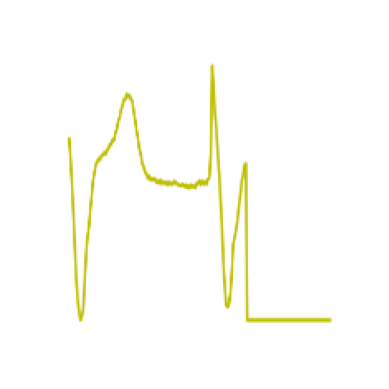

In [53]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Distribution of Classes

In [54]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)


Class Distribution:
Counter({Ellipsis: 1})


Image Statistics

In [55]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 251.58011134141157
Standard deviation of pixel values: 22.794732320071795


Data Preprocessing

In [56]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Color Distribution

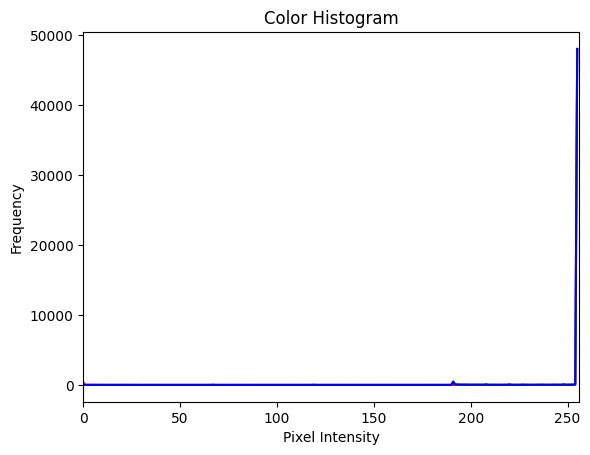

In [57]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

Feature Extraction

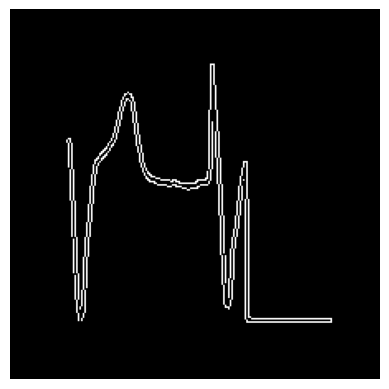

In [58]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Dimensionality Reduction

C:\Users\Student\AppData\Local\Temp\8\ipykernel_29740\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


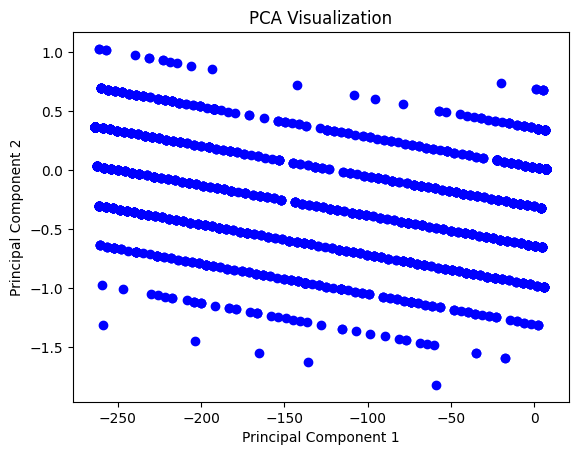

In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


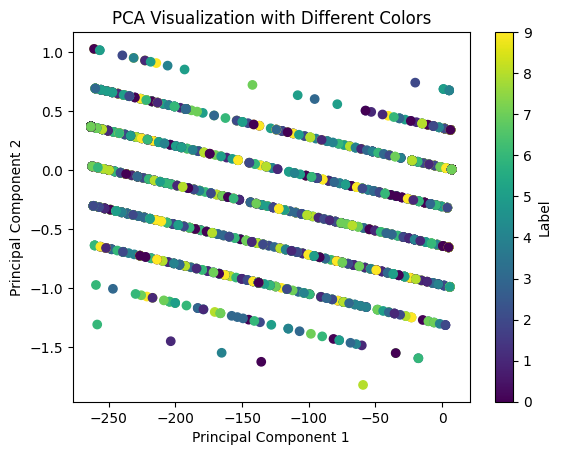

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()


Correlation Analysis

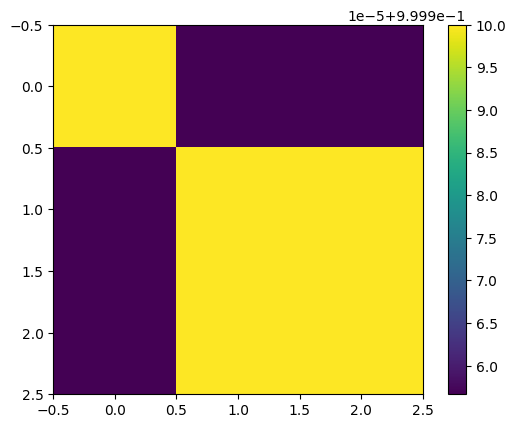

In [61]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

Outlier Detection

In [62]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([ 7514,  7737,  7738, ..., 42527, 42528, 42529], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


Data Augmentation

In [63]:
# Example: Data augmentation using OpenCV
# (e.g., flipping, rotation, scaling)
flipped_image = cv2.flip(example_image, 1)
print(flipped_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Label Analysis

In [64]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# **Preprocessing S folder**

Load Dataset

In [65]:
# Train S Images
import os
import cv2

# Define the directory containing the images
data_dir = "ECG_Image_data/train/S"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.png')]

# Load an example image
example_image = cv2.imread(image_files[0])

Resize Images

In [66]:
import cv2
import os

# Assuming `image_files` is a list of file paths to your images
# Load an example image to check dimensions
example_image = cv2.imread(image_files[0])

# Check the number of images
num_images = len(image_files)

# Check the dimensions of an image
image_height, image_width, channels = example_image.shape

print("Number of images:", num_images)
print("Image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Define the new size
new_size = (224, 224)

# Directory to save resized images
save_directory = "resized_images_of_S"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image
def resize_image(image_path, new_size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Loop through all images and resize them
resized_images = []
for image_path in image_files:
    resized_image = resize_image(image_path, new_size)
    resized_images.append(resized_image)

# Save the resized images to the specified directory
for idx, image in enumerate(resized_images):
    save_path = os.path.join(save_directory, f"resized_image_{idx}.png")
    cv2.imwrite(save_path, image)
    print(f"Saved resized image to {save_path}")


Number of images: 2223
Image dimensions: 288 x 432
Number of channels: 3
Saved resized image to resized_images_of_S\resized_image_0.png
Saved resized image to resized_images_of_S\resized_image_1.png
Saved resized image to resized_images_of_S\resized_image_2.png
Saved resized image to resized_images_of_S\resized_image_3.png
Saved resized image to resized_images_of_S\resized_image_4.png
Saved resized image to resized_images_of_S\resized_image_5.png
Saved resized image to resized_images_of_S\resized_image_6.png
Saved resized image to resized_images_of_S\resized_image_7.png
Saved resized image to resized_images_of_S\resized_image_8.png
Saved resized image to resized_images_of_S\resized_image_9.png
Saved resized image to resized_images_of_S\resized_image_10.png
Saved resized image to resized_images_of_S\resized_image_11.png
Saved resized image to resized_images_of_S\resized_image_12.png
Saved resized image to resized_images_of_S\resized_image_13.png
Saved resized image to resized_images_of_

Data Inspection

In [67]:
import cv2
import os
import glob

# Directory containing the resized images
folder_path = "resized_images_of_S"

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Check the dimensions of the first image as a reference
example_image = cv2.imread(image_files[0])
image_height, image_width, channels = example_image.shape
print("Example image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break


Number of images: 2223
Example image dimensions: 224 x 224
Number of channels: 3


Visualization

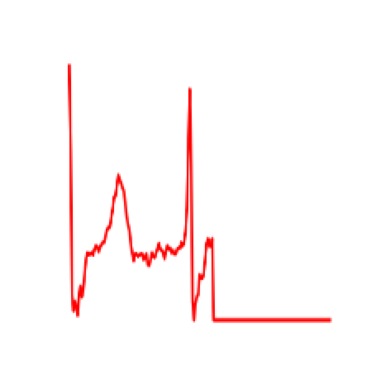

In [68]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Distribution of Classes

In [69]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)


Class Distribution:
Counter({Ellipsis: 1})


Image Statistics

In [70]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 250.51400403911563
Standard deviation of pixel values: 30.439875717409066


Data Preprocessing

In [71]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Color Distribution

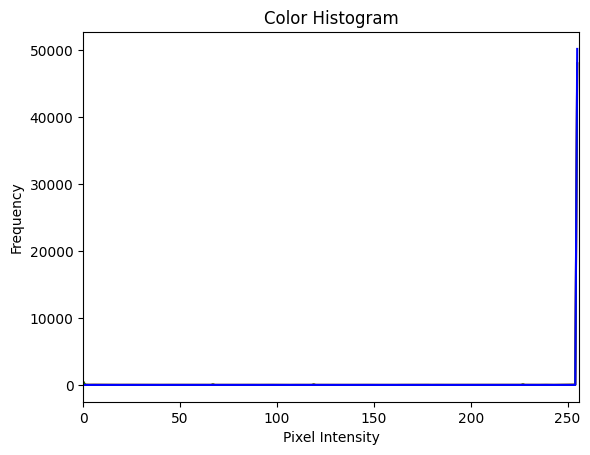

In [72]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

Feature Extration

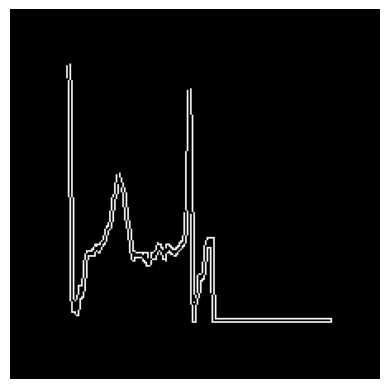

In [73]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Dimensionality Reduction

C:\Users\Student\AppData\Local\Temp\8\ipykernel_29740\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


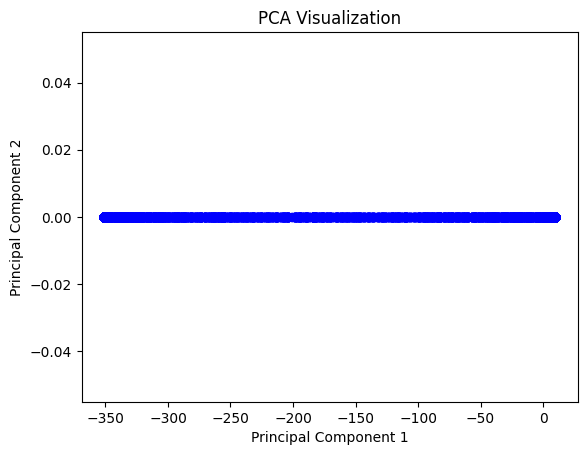

In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


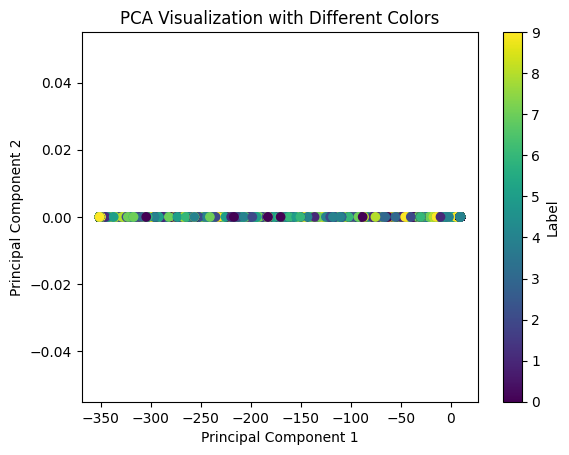

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()


Correlation Analysis

C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


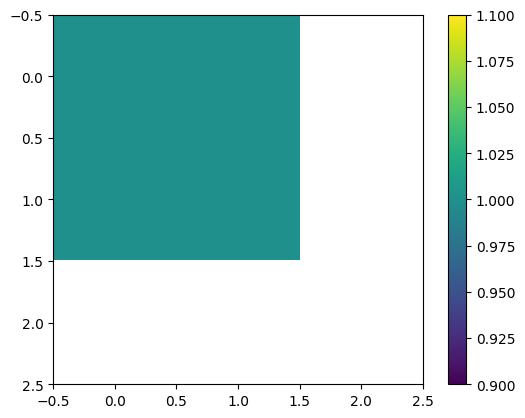

In [76]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

Outlier Detection

In [77]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([ 7427,  7427,  7428, ..., 42528, 42529, 42529], dtype=int64), array([0, 1, 0, ..., 1, 0, 1], dtype=int64))


Data Augmentation

In [78]:
# Example: Data augmentation using OpenCV
# (e.g., flipping, rotation, scaling)
flipped_image = cv2.flip(example_image, 1)
print(flipped_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Label Analysis

In [79]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# **Preprocessing V folder**

Load Dataset

In [80]:
# Train V Images
import os
import cv2

# Define the directory containing the images
data_dir = "ECG_Image_data/train/V"

# List all image files in the directory
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.png')]

# Load an example image
example_image = cv2.imread(image_files[0])

Resize Images

In [81]:
import cv2
import os

# Assuming `image_files` is a list of file paths to your images
# Load an example image to check dimensions
example_image = cv2.imread(image_files[0])

# Check the number of images
num_images = len(image_files)

# Check the dimensions of an image
image_height, image_width, channels = example_image.shape

print("Number of images:", num_images)
print("Image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Define the new size
new_size = (224, 224)

# Directory to save resized images
save_directory = "resized_images_of_V"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to resize an image
def resize_image(image_path, new_size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Loop through all images and resize them
resized_images = []
for image_path in image_files:
    resized_image = resize_image(image_path, new_size)
    resized_images.append(resized_image)

# Save the resized images to the specified directory
for idx, image in enumerate(resized_images):
    save_path = os.path.join(save_directory, f"resized_image_{idx}.png")
    cv2.imwrite(save_path, image)
    print(f"Saved resized image to {save_path}")


Number of images: 5789
Image dimensions: 288 x 432
Number of channels: 3
Saved resized image to resized_images_of_V\resized_image_0.png
Saved resized image to resized_images_of_V\resized_image_1.png
Saved resized image to resized_images_of_V\resized_image_2.png
Saved resized image to resized_images_of_V\resized_image_3.png
Saved resized image to resized_images_of_V\resized_image_4.png
Saved resized image to resized_images_of_V\resized_image_5.png
Saved resized image to resized_images_of_V\resized_image_6.png
Saved resized image to resized_images_of_V\resized_image_7.png
Saved resized image to resized_images_of_V\resized_image_8.png
Saved resized image to resized_images_of_V\resized_image_9.png
Saved resized image to resized_images_of_V\resized_image_10.png
Saved resized image to resized_images_of_V\resized_image_11.png
Saved resized image to resized_images_of_V\resized_image_12.png
Saved resized image to resized_images_of_V\resized_image_13.png
Saved resized image to resized_images_of_

Data Inspection

In [82]:
import cv2
import os
import glob

# Directory containing the resized images
folder_path = "resized_images_of_V"

# Get the list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, "*.png"))

# Check the number of images
num_images = len(image_files)
print("Number of images:", num_images)

# Check the dimensions of the first image as a reference
example_image = cv2.imread(image_files[0])
image_height, image_width, channels = example_image.shape
print("Example image dimensions:", image_height, "x", image_width)
print("Number of channels:", channels)

# Loop through all images and verify their dimensions
all_images_same_size = True
for image_path in image_files:
    image = cv2.imread(image_path)
    if image.shape != (image_height, image_width, channels):
        all_images_same_size = False
        break


Number of images: 5789
Example image dimensions: 224 x 224
Number of channels: 3


Visualization

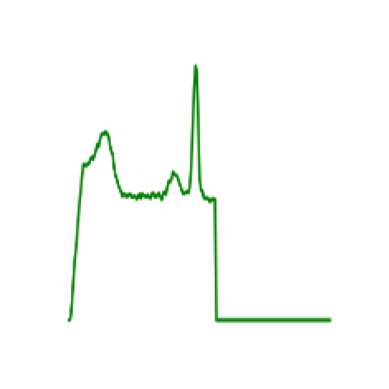

In [83]:
import matplotlib.pyplot as plt

# Visualize a sample image
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Distribution of Classes

In [84]:
# Assuming you have a list of labels for each image
labels = [...]

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(labels)

print("Class Distribution:")
print(label_counts)


Class Distribution:
Counter({Ellipsis: 1})


Image Statistics

In [85]:
import numpy as np

# Compute statistics
mean_pixel = np.mean(example_image)
std_pixel = np.std(example_image)

print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 250.94590375212584
Standard deviation of pixel values: 27.08307027781233


Data Preprocessing

In [86]:
# Example: Resize images to a common size
target_size = (100, 100)
resized_image = cv2.resize(example_image, target_size)
print(resized_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Color Distribution

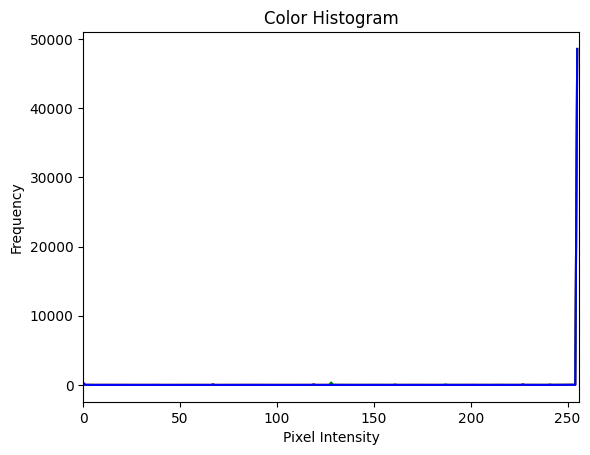

In [87]:
# Plot histograms for RGB channels
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([example_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

Feature Extration

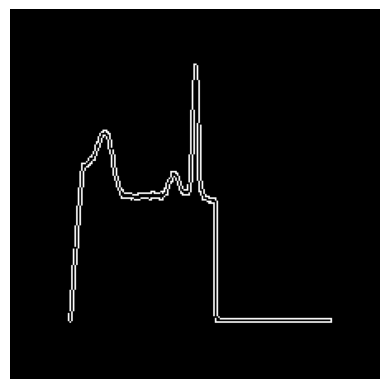

In [88]:
# Example: Edge detection
edges = cv2.Canny(example_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Dimensionality Reduction

C:\Users\Student\AppData\Local\Temp\8\ipykernel_29740\3778998753.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


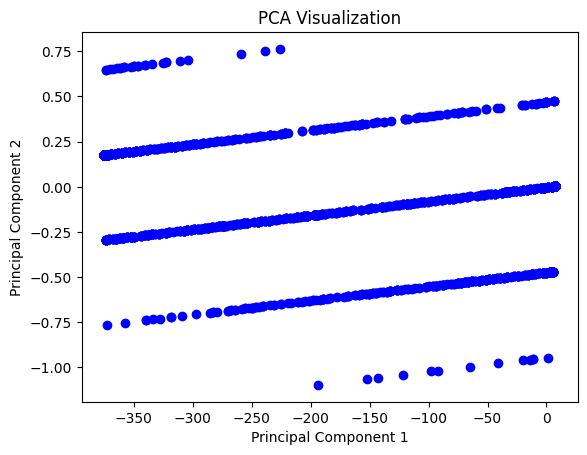

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Plotting the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


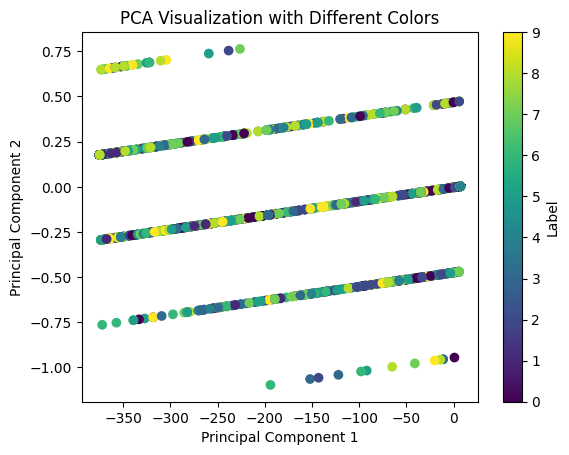

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'flattened_images' and 'labels' defined earlier

# Reshape images to vectors
flattened_images = example_image.reshape(-1, example_image.shape[-1])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Assuming 'labels' is a list or array of numeric values
# If 'labels' is not defined, replace it with the appropriate variable containing the labels
labels = np.random.randint(0, 10, size=len(pca_result))  # Example: random labels for demonstration

# Plotting the PCA results with different colors based on 'labels'
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Different Colors')
plt.show()


Correlation Analysis

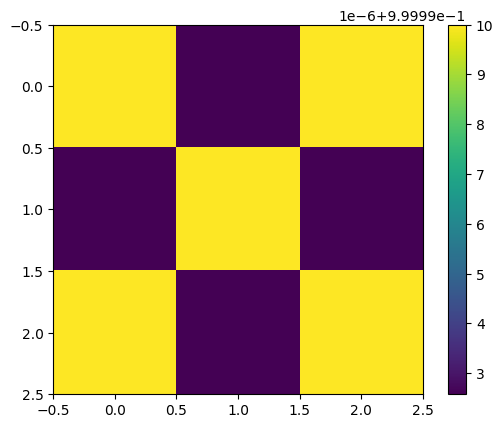

In [91]:
# Example: Compute correlation matrix
correlation_matrix = np.corrcoef(flattened_images.T)
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.show()

Outlier Detection

In [92]:
# Example: Z-score outlier detection
z_scores = (flattened_images - mean_pixel) / std_pixel
outliers = np.where(np.abs(z_scores) > 3)

print("Outlier indices:", outliers)

Outlier indices: (array([ 7504,  7504,  7727, ..., 42528, 42529, 42529], dtype=int64), array([0, 2, 0, ..., 2, 0, 2], dtype=int64))


Data Augmentation

In [93]:
# Example: Data augmentation using OpenCV
# (e.g., flipping, rotation, scaling)
flipped_image = cv2.flip(example_image, 1)
print(flipped_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Label Analysis

In [94]:
# Example: Check for unique labels
unique_labels = set(labels)
print("Unique labels:", unique_labels)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Create Folder

In [95]:
import os
import shutil

# Define the source paths of the subfolders
source_folders = [
    "resized_images_of_F",
    "resized_images_of_M",
    "resized_images_of_N",
    "resized_images_of_Q",
    "resized_images_of_S",
    "resized_images_of_V"
]

# Define the path for the new directory
new_directory = "Train_resized_images"

# Create the new directory
os.makedirs(new_directory, exist_ok=True)

# Move the subfolders into the new directory
for folder in source_folders:
    if os.path.exists(folder):
        shutil.move(folder, new_directory)
    else:
        print(f"Folder {folder} does not exist.")

print(f"All folders have been moved to {new_directory}.")


All folders have been moved to Train_resized_images.


# **Zip File of Trained_resized_images**

In [96]:
!zip -r /content/Train_resized_images.zip /content/Train_resized_images

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [97]:
!zip -r ECG_Preprocessing.zip ECG_Preprocessing

'zip' is not recognized as an internal or external command,
operable program or batch file.


# **Unzip the file**

In [98]:
# Unzip the file
!unzip /content/drive/MyDrive/Train_resized_images.zip


unzip:  cannot find or open /content/drive/MyDrive/Train_resized_images.zip, /content/drive/MyDrive/Train_resized_images.zip.zip or /content/drive/MyDrive/Train_resized_images.zip.ZIP.


## **Apply SMOTE Analysis**

In [21]:
pip install numpy keras opencv-python imbalanced-learn tensorflow scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Import Libraries

In [22]:
import os
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

Functions for Data Loading and Preprocessing

In [23]:
# Function to load and preprocess a batch of images
def load_and_preprocess_images_batch(image_files, target_size=(224, 224), batch_size=32):
    for i in range(0, len(image_files), batch_size):
        batch_files = image_files[i:i+batch_size]
        images = []
        for image_path in batch_files:
            # Load image
            img = load_img(image_path, target_size=target_size)
            # Convert image to array
            img_array = img_to_array(img)
            # Normalize the image
            img_array = preprocess_input(img_array)
            images.append(img_array)
        yield np.array(images)

# Function to get all image files from subdirectories
def get_all_image_files(root_dir, extensions=('.png',)):
    image_files = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(extensions):
                image_files.append(os.path.join(subdir, file))
    return image_files

# Directory containing the resized images
folder_path = 'Train_resized_images'

# Get the list of all image files in the folder and subfolders
image_files = get_all_image_files(folder_path)

# Load the VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features in batches
features = []
batch_size = 32
for image_batch in load_and_preprocess_images_batch(image_files, batch_size=batch_size):
    batch_features = vgg16_model.predict(image_batch)
    features.append(batch_features)
features = np.vstack(features)

# Flatten the features
features_flattened = features.reshape(features.shape[0], -1)

# Assuming you have labels for the images
labels = []
for img in image_files:
    if "resized_images_of_F" in img:
        labels.append(0)
    elif "resized_images_of_M" in img:
        labels.append(1)
    elif "resized_images_of_N" in img:
        labels.append(2)
    elif "resized_images_of_Q" in img:
        labels.append(3)
    elif "resized_images_of_S" in img:
        labels.append(4)
    elif "resized_images_of_V" in img:
        labels.append(5)

# Shuffle the features and labels to avoid any ordering issues
features_flattened, labels = shuffle(features_flattened, labels, random_state=42)

# Check if labels are generated correctly
print(f"Generated labels for {len(labels)} images.")
if len(labels) == 0:
    raise ValueError("No labels generated. Check the labels generation logic.")

# Apply PCA to reduce dimensionality if needed
pca = PCA(n_components=100, random_state=42)
features_pca = pca.fit_transform(features_flattened)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━

Apply SMOTE to Balance the Dataset

In [24]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
features_balanced, labels_balanced = smote.fit_resample(features_pca, labels)

print("SMOTE applied successfully!")
print("Number of samples after SMOTE:", len(labels_balanced))

SMOTE applied successfully!
Number of samples after SMOTE: 454254


Define the GAN Architecture

In [25]:
# Define dimensions
feature_dim = features_balanced.shape[1]  # 100 after PCA
latent_dim = 50  # Size of the noise vector

# Build Generator
def build_generator(latent_dim, feature_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(feature_dim, activation='linear'))  # Linear activation for regression
    return model

# Build Discriminator
def build_discriminator(feature_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=feature_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile Discriminator
discriminator = build_discriminator(feature_dim)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
                      metrics=['accuracy'])

# Build and compile the Generator
generator = build_generator(latent_dim, feature_dim)

# Create GAN by combining Generator and Discriminator
gan = Sequential()
gan.add(generator)
discriminator.trainable = False  # Freeze Discriminator weights in GAN
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Train the GAN

In [26]:
import matplotlib.pyplot as plt

# Training parameters
epochs = 1000
batch_size_gan = 64
sample_interval = 100

# Labels for real and fake data
real = np.ones((batch_size_gan, 1))
fake = np.zeros((batch_size_gan, 1))

for epoch in range(epochs + 1):
    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of real samples
    idx = np.random.randint(0, features_balanced.shape[0], batch_size_gan)
    real_features = features_balanced[idx]

    # Generate a batch of fake samples
    noise = np.random.normal(0, 1, (batch_size_gan, latent_dim))
    generated_features = generator.predict(noise)

    # Train the Discriminator
    d_loss_real = discriminator.train_on_batch(real_features, real)
    d_loss_fake = discriminator.train_on_batch(generated_features, fake)

    # Combine the two losses
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size_gan, latent_dim))
    # The generator wants the discriminator to label the generated samples as real
    g_loss = gan.train_on_batch(noise, real)

    # Ensure that g_loss is a scalar and not a list
    if isinstance(g_loss, list):
        g_loss = g_loss[0]

    # Print the progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 24.0868, acc.: 41.41%] [G loss: 16.2547]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 

Generate Synthetic Samples with the Trained Generator


In [27]:
# Number of synthetic samples to generate
num_synthetic = 500  # Adjust as needed

# Generate synthetic samples
noise = np.random.normal(0, 1, (num_synthetic, latent_dim))
synthetic_features = generator.predict(noise)

# Optionally, apply inverse PCA transformation to map back to original feature space
# synthetic_features_original_space = pca.inverse_transform(synthetic_features)

# Assign labels to synthetic samples
# Assuming binary classification; adjust if more classes
synthetic_labels = np.random.choice([0,1], size=num_synthetic)  # Alternatively, match minority class

# Append synthetic samples to the balanced dataset
features_augmented = np.vstack((features_balanced, synthetic_features))
labels_augmented = np.hstack((labels_balanced, synthetic_labels))

print("GAN augmentation completed.")
print("Number of samples after GAN augmentation:", len(labels_augmented))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
GAN augmentation completed.
Number of samples after GAN augmentation: 454754


Save file

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split into training (70%) and temp (30% for testing and validation)
X_train, X_temp, y_train, y_temp = train_test_split(features_balanced, labels_balanced, test_size=0.3, random_state=42)

# Now split the temp set (30%) into test (15%) and validation (15%) - half of 30%
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Confirm the split sizes
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Validation set: {len(X_val)} samples")

# Save the splits to files
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('X_val.npy', X_val)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
np.save('y_val.npy', y_val)

print("Data saved to files: X_train.npy, X_test.npy, X_val.npy, y_train.npy, y_test.npy, y_val.npy")


Training set: 317977 samples
Test set: 68138 samples
Validation set: 68139 samples
Data saved to files: X_train.npy, X_test.npy, X_val.npy, y_train.npy, y_test.npy, y_val.npy
